In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
hoffman=pd.read_csv("Hoffman_Stores_Data.csv")

In [4]:
store=pd.read_csv("store.csv")

# Hoffman Dataset Analysis

In [5]:
hoffman.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [7]:
hoffman.shape

(1017209, 9)

In [8]:
hoffman.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
hoffman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
hoffman.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
#Mapping the values of StateHoliday 
hoffman['StateHoliday']=hoffman['StateHoliday'].map({0:0,"0":0,"a":1,"b":1,"c":1})

In [12]:
hoffman['StateHoliday'].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [13]:
#Extracting features from Date columns
from datetime import datetime
hoffman['year'] = pd.DatetimeIndex(hoffman['Date']).year
hoffman['month'] = pd.DatetimeIndex(hoffman['Date']).month
hoffman['date'] = pd.DatetimeIndex(hoffman['Date']).day

In [14]:
hoffman.year.unique()

array([2015, 2014, 2013], dtype=int64)

In [15]:
hoffman.month.unique()

array([ 7, 12, 11, 10,  9,  8,  6,  5,  4,  3,  2,  1], dtype=int64)

In [16]:
hoffman.date.unique()

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8],
      dtype=int64)

In [18]:
hoffman.Store.nunique()

1115

# Store Dataset Analysis

In [19]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
store.shape

(1115, 10)

In [21]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [22]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [23]:
# Dropping the columns which have more than 25% of missing data

store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1,inplace=True)

In [24]:
store.shape

(1115, 5)

In [25]:
# Filling the missing values of the columns in Store Dataset

store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)

In [26]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   object 
 2   Assortment           1115 non-null   object 
 3   CompetitionDistance  1115 non-null   float64
 4   Promo2               1115 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 43.7+ KB


# Merging to Dataset to form Single Dataset

In [27]:
dataframe=pd.merge(hoffman,store,how='left',on='Store')

In [28]:
dataframe.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,date,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,31-07-2015,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,0
1,2,5,31-07-2015,6064,625,1,1,0,1,2015,7,31,a,a,570.0,1
2,3,5,31-07-2015,8314,821,1,1,0,1,2015,7,31,a,a,14130.0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1,2015,7,31,c,c,620.0,0
4,5,5,31-07-2015,4822,559,1,1,0,1,2015,7,31,a,a,29910.0,0


In [29]:
dataframe.shape

(1017209, 16)

In [30]:
dataframe.drop('Date',axis=1,inplace=True)

In [31]:
dataframe.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,date,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,0
1,2,5,6064,625,1,1,0,1,2015,7,31,a,a,570.0,1
2,3,5,8314,821,1,1,0,1,2015,7,31,a,a,14130.0,1
3,4,5,13995,1498,1,1,0,1,2015,7,31,c,c,620.0,0
4,5,5,4822,559,1,1,0,1,2015,7,31,a,a,29910.0,0


In [34]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Sales                1017209 non-null  int64  
 3   Customers            1017209 non-null  int64  
 4   Open                 1017209 non-null  int64  
 5   Promo                1017209 non-null  int64  
 6   StateHoliday         1017209 non-null  int64  
 7   SchoolHoliday        1017209 non-null  int64  
 8   year                 1017209 non-null  int64  
 9   month                1017209 non-null  int64  
 10  date                 1017209 non-null  int64  
 11  StoreType            1017209 non-null  object 
 12  Assortment           1017209 non-null  object 
 13  CompetitionDistance  1017209 non-null  float64
 14  Promo2               1017209 non-null  int64  
dty

# Encoding the Columns having categorical values 

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataframe["StoreType"]=le.fit_transform(dataframe["StoreType"])
dataframe["Assortment"]=le.fit_transform(dataframe["Assortment"])

In [36]:
dataframe["StoreType"].value_counts()

0    551627
3    312912
2    136840
1     15830
Name: StoreType, dtype: int64

In [37]:
dataframe['Assortment'].value_counts()

0    537445
2    471470
1      8294
Name: Assortment, dtype: int64

# Plotting Box Plot to check if Outliers are present or not

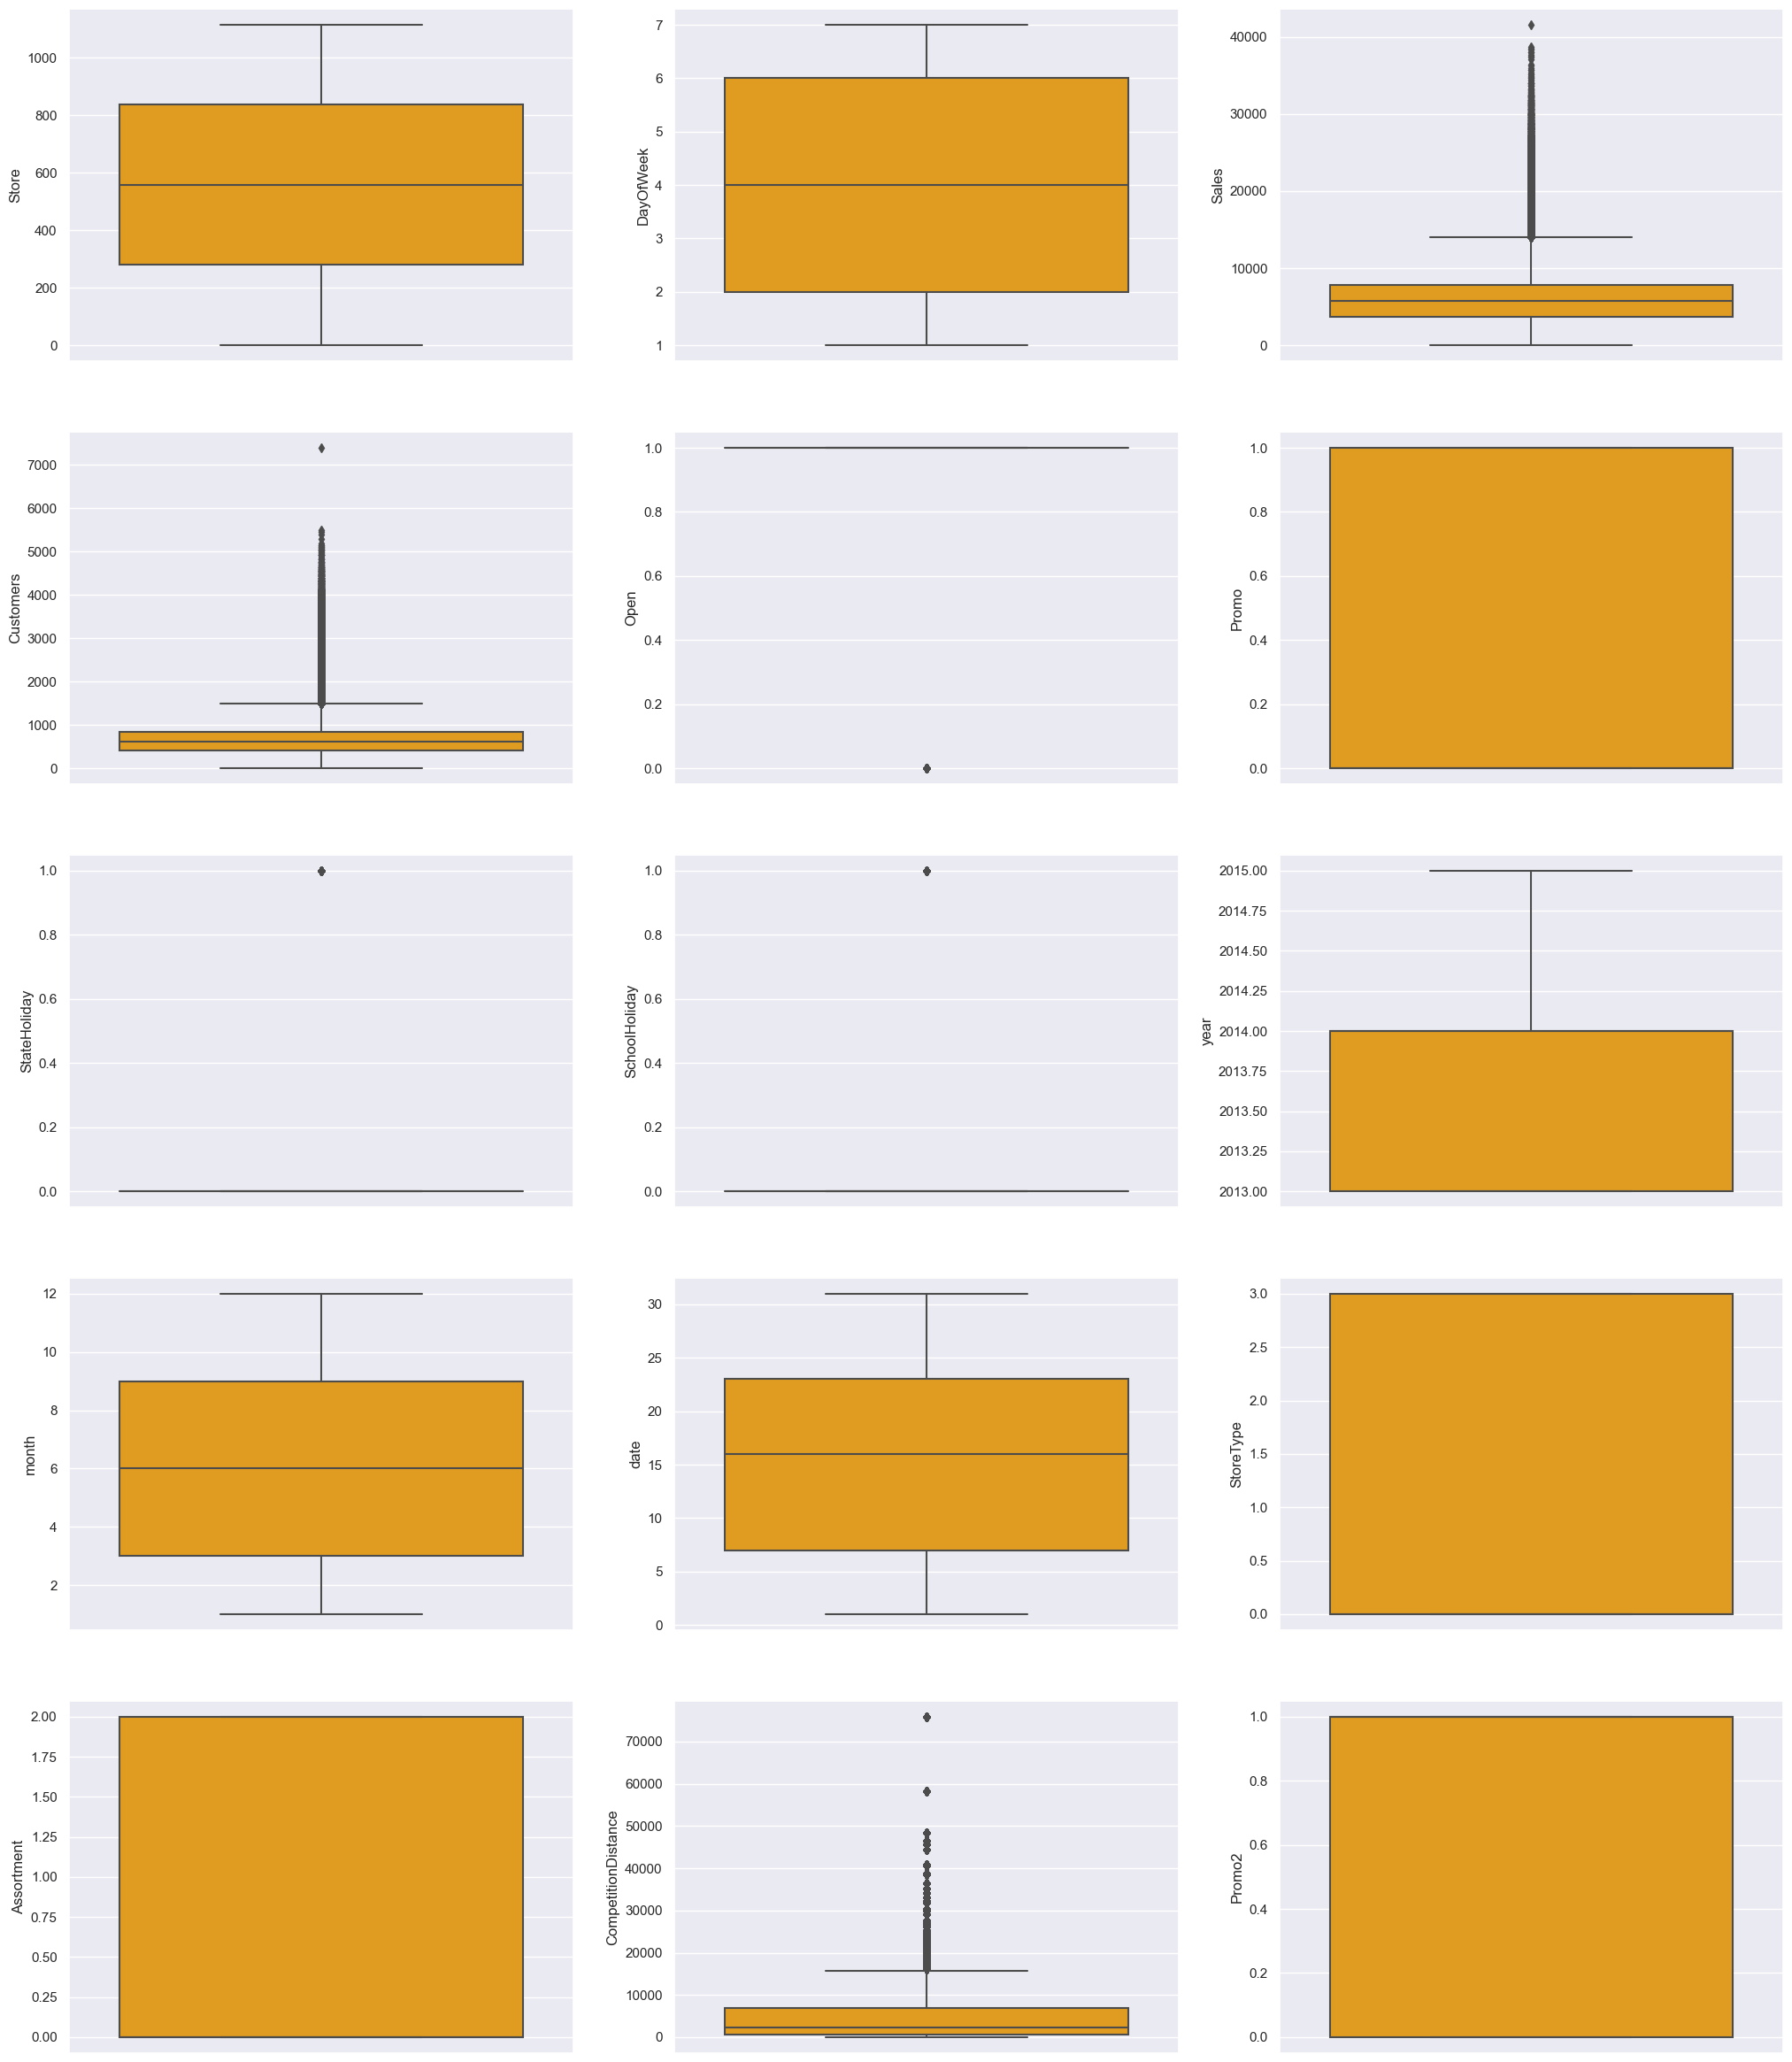

In [38]:
#box plot

fig, ax=plt.subplots(ncols=3,nrows=5,figsize=(25,30))
index=0
ax=ax.flatten()

for cols,value in dataframe.items():
    sns.boxplot(y=cols,data=dataframe,ax=ax[index],color="orange")
    index+=1

# Treating the Outliers present in the Dataset

In [43]:
percentile25 = dataframe['CompetitionDistance'].quantile(0.25)
percentile75 = dataframe['CompetitionDistance'].quantile(0.75)
iqr = percentile75 - percentile25
iqr 

6170.0

In [44]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [45]:
#we are using capping method to treat the outliers

dataframe['CompetitionDistance'] = np.where(
    dataframe['CompetitionDistance'] > upper_limit,
    upper_limit,
    np.where(
        dataframe['CompetitionDistance'] < lower_limit,
        lower_limit,
        dataframe['CompetitionDistance']
    )
)

<AxesSubplot: xlabel='CompetitionDistance'>

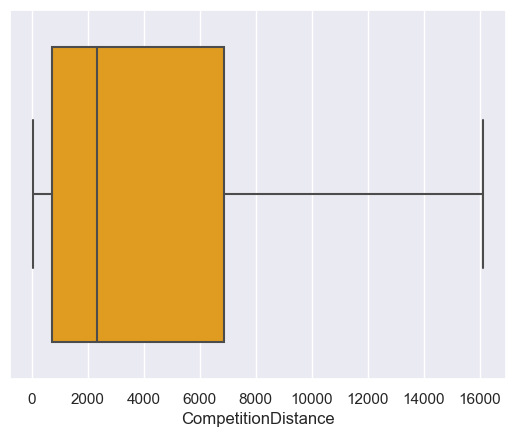

In [46]:
sns.boxplot(dataframe['CompetitionDistance'],color='orange')

In [47]:
percentile25 = dataframe['Customers'].quantile(0.25)
percentile75 = dataframe['Customers'].quantile(0.75)
iqr = percentile75 - percentile25
iqr 

432.0

In [48]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [49]:
dataframe['Customers'] = np.where(
    dataframe['Customers'] > upper_limit,
    upper_limit,
    np.where(
        dataframe['Customers'] < lower_limit,
        lower_limit,
        dataframe['Customers']
    )
)

<AxesSubplot: xlabel='Customers'>

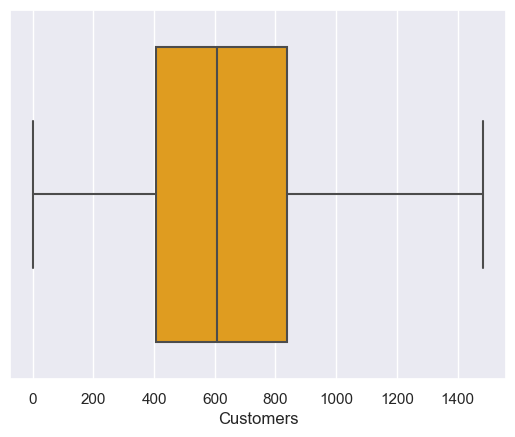

In [50]:
sns.boxplot(dataframe['Customers'],color='orange')

In [51]:
percentile25 = dataframe['Sales'].quantile(0.25)
percentile75 = dataframe['Sales'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

4129.0

In [52]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [53]:
dataframe['Sales'] = np.where(
    dataframe['Sales'] > upper_limit,
    upper_limit,
    np.where(
        dataframe['Sales'] < lower_limit,
        lower_limit,
        dataframe['Sales']
    )
)

<AxesSubplot: xlabel='Sales'>

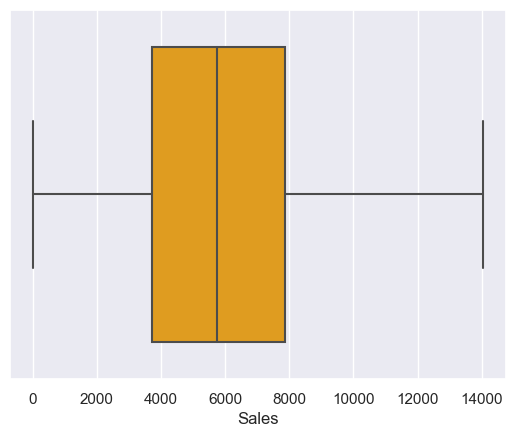

In [54]:
sns.boxplot(dataframe['Sales'],color='orange')

In [58]:
# Droping the records where Store is not Open as no sales is generated when store is closed
dataframe=dataframe[dataframe.Open != 0]


In [59]:
#Droping the Column Open as it no longer required
dataframe.drop('Open', axis=1, inplace=True)

In [62]:
dataframe.shape

(844392, 14)

In [61]:
#Checking if there is any store with zero sales
dataframe[dataframe.Sales ==0]['Store'].sum()

31460

In [63]:
#Droping the record where sales is zero
dataframe=dataframe[dataframe.Sales !=0]

In [65]:
dataframe_new=dataframe.copy()


In [66]:
dataframe_new.shape

(844338, 14)

In [67]:
matrix=dataframe_new.corr()
matrix.style.background_gradient(cmap='YlOrBr')

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,date,StoreType,Assortment,CompetitionDistance,Promo2
Store,1.000000,0.000343,0.005420,0.032555,-0.000015,0.002597,0.000526,0.000300,0.000814,0.000079,-0.021149,0.005733,-0.026556,0.007728
DayOfWeek,0.000343,1.000000,-0.187965,-0.132451,-0.289268,-0.001958,-0.139319,0.002099,0.005056,-0.000949,-0.001974,0.001215,0.001324,-0.003252
Sales,0.005420,-0.187965,1.000000,0.838552,0.395374,0.013023,0.040853,0.041560,-0.034155,-0.014584,-0.004116,0.114060,-0.028243,-0.123033
Customers,0.032555,-0.132451,0.838552,1.000000,0.233272,0.028157,0.032023,0.000344,-0.008433,-0.016277,-0.220918,0.002468,-0.201199,-0.218655
Promo,-0.000015,-0.289268,0.395374,0.233272,1.000000,0.002165,0.028971,0.023990,-0.137610,-0.072796,0.000324,-0.000333,-0.000469,-0.000316
StateHoliday,0.002597,-0.001958,0.013023,0.028157,0.002165,1.000000,0.012593,0.002365,-0.011098,-0.003181,-0.004288,-0.000371,0.001983,-0.010308
SchoolHoliday,0.000526,-0.139319,0.040853,0.032023,0.028971,0.012593,1.000000,-0.038686,0.091489,0.046215,-0.002263,-0.002714,-0.003609,-0.008244
year,0.000300,0.002099,0.041560,0.000344,0.023990,0.002365,-0.038686,1.000000,-0.167202,-0.028540,-0.001492,0.002034,0.000239,-0.005696
month,0.000814,0.005056,-0.034155,-0.008433,-0.137610,-0.011098,0.091489,-0.167202,1.000000,-0.103815,-0.004486,0.004701,0.000472,-0.014128
date,0.000079,-0.000949,-0.014584,-0.016277,-0.072796,-0.003181,0.046215,-0.028540,-0.103815,1.000000,-0.000870,0.001441,0.000180,-0.002929


<AxesSubplot: xlabel='year', ylabel='count'>

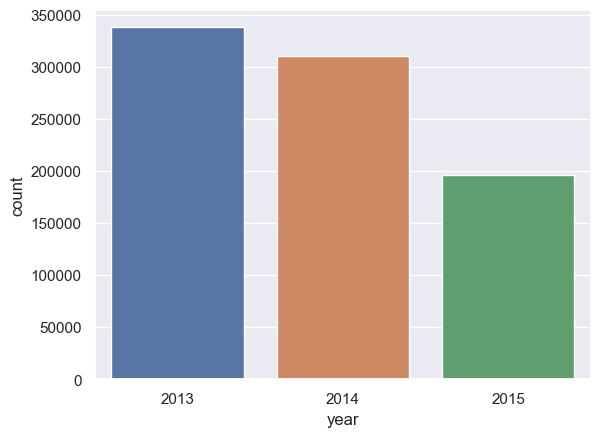

In [68]:
sns.countplot(data=dataframe_new, x="year")

<AxesSubplot: xlabel='DayOfWeek', ylabel='count'>

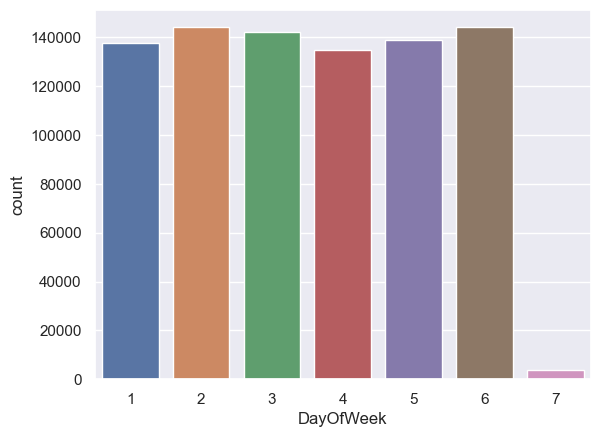

In [69]:
sns.countplot(data=dataframe_new, x="DayOfWeek")

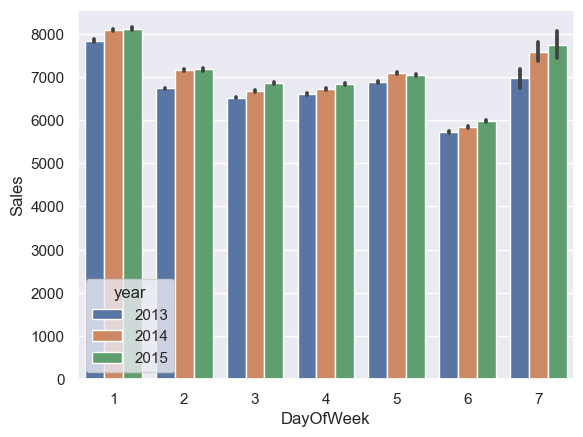

In [70]:
sns.barplot(dataframe_new['DayOfWeek'],dataframe_new['Sales'],hue=dataframe_new['year'])
plt.show()

<AxesSubplot: xlabel='date'>

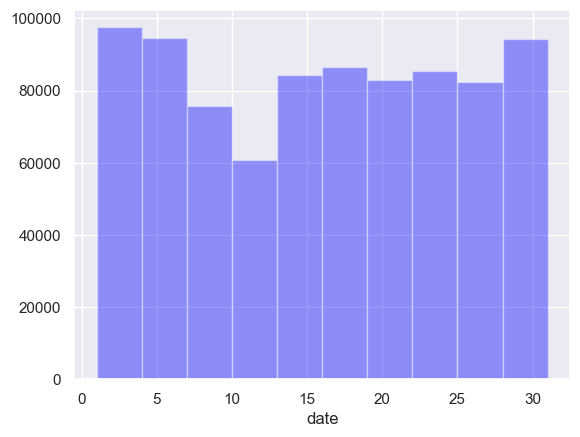

In [76]:
sns.distplot(dataframe_new['date'],color='blue',kde=False,bins=10)

<AxesSubplot: xlabel='StoreType', ylabel='count'>

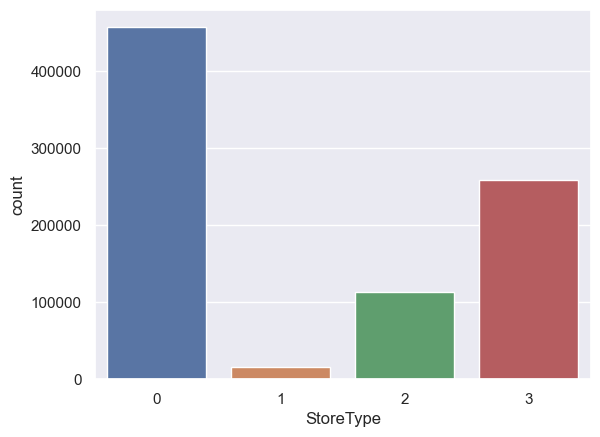

In [85]:
sns.countplot(data=dataframe_new,x='StoreType')

<AxesSubplot: xlabel='Assortment', ylabel='count'>

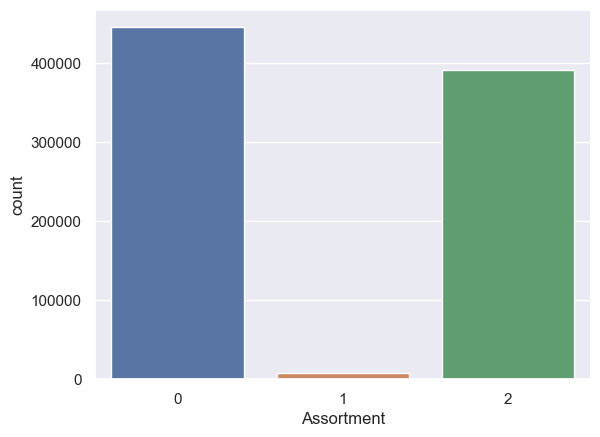

In [86]:
sns.countplot(data=dataframe_new,x='Assortment')

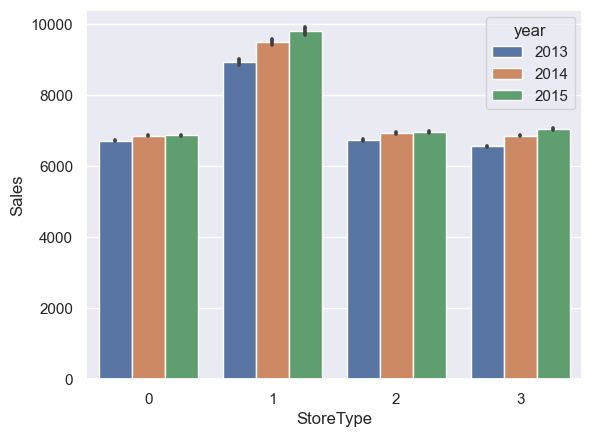

In [79]:
sns.barplot(dataframe_new['StoreType'],dataframe_new['Sales'],hue=dataframe_new['year'])
plt.show()

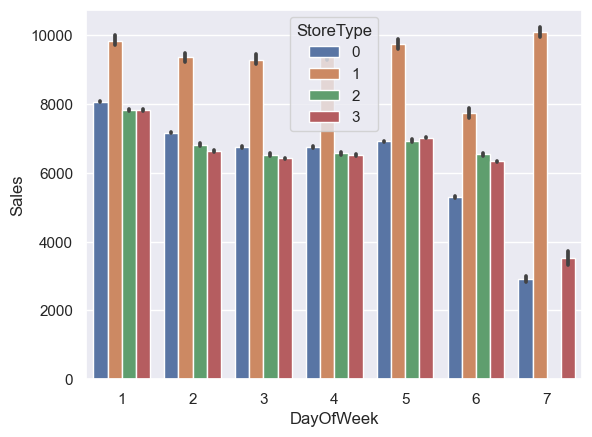

In [82]:
sns.barplot(dataframe_new['DayOfWeek'],dataframe_new['Sales'],hue=dataframe_new['StoreType'])
plt.show()

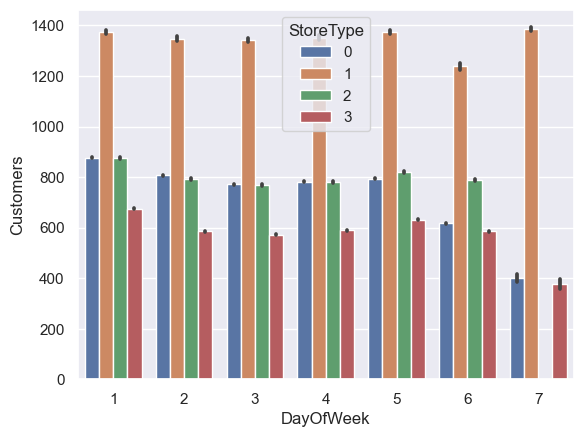

In [88]:
sns.barplot(dataframe_new['DayOfWeek'],dataframe_new['Customers'],hue=dataframe_new['StoreType'])
plt.show()

In [89]:
X = dataframe_new.drop(['Sales','Store'] , axis = 1)
y= dataframe_new.Sales

In [90]:
X

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,year,month,date,StoreType,Assortment,CompetitionDistance,Promo2
0,5,555.0,1,0,1,2015,7,31,2,0,1270.0,0
1,5,625.0,1,0,1,2015,7,31,0,0,570.0,1
2,5,821.0,1,0,1,2015,7,31,0,0,14130.0,1
3,5,1485.0,1,0,1,2015,7,31,2,2,620.0,0
4,5,559.0,1,0,1,2015,7,31,0,0,16135.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,2,566.0,0,1,1,2013,1,1,1,0,150.0,0
1016827,2,1485.0,0,1,1,2013,1,1,1,1,860.0,0
1016863,2,1248.0,0,1,1,2013,1,1,1,1,840.0,1
1017042,2,1039.0,0,1,1,2013,1,1,1,1,1430.0,0


In [91]:
y

0           5263.0
1           6064.0
2           8314.0
3          13995.0
4           4822.0
            ...   
1016776     3375.0
1016827    10765.0
1016863     5035.0
1017042     4491.0
1017190     5961.0
Name: Sales, Length: 844338, dtype: float64

# Features Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)

In [93]:
x = pd.DataFrame(x_scaler, columns=X.columns[:])

# Data spliting into train and test data

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# Model Building

In [95]:
#1. Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
LR=lr.fit(x_train, y_train)

In [96]:
y_pred_train=LR.predict(x_train)

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_absolute_percentage_error
print("TRAIN R2_Score :", r2_score(y_train, y_pred_train))
print("*****************************")
print("TRAIN MAE :", mean_absolute_error(y_train, y_pred_train))
print("*****************************")
print("TRAIN MAPE :", mean_absolute_percentage_error(y_train, y_pred_train))

TRAIN R2_Score : 0.7985362664222224
*****************************
TRAIN MAE : 933.3171350718926
*****************************
TRAIN MAPE : 0.14547690553229875


In [98]:
y_pred=LR.predict(x_test)

In [99]:
print("TEST R2_Score :", r2_score(y_test, y_pred))
print("*****************************")
print("TEST MAE :", mean_absolute_error(y_test, y_pred))
print("*****************************")
print("TEST MAPE :", mean_absolute_percentage_error(y_test, y_pred))

TEST R2_Score : 0.7979288189969203
*****************************
TEST MAE : 934.1227973744074
*****************************
TEST MAPE : 0.1458258463925522


In [100]:
#2.Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
Dt= DecisionTreeRegressor()
DTREE=Dt.fit(x_train,y_train)

In [101]:
y_pred_train=DTREE.predict(x_train)

In [102]:
print("TRAIN R2_Score :", r2_score(y_train, y_pred_train))
print("*****************************")
print("TRAIN MAE :", mean_absolute_error(y_train, y_pred_train))
print("*****************************")
print("TRAIN MAPE :", mean_absolute_percentage_error(y_train, y_pred_train))

TRAIN R2_Score : 0.999794165166463
*****************************
TRAIN MAE : 1.619866661457529
*****************************
TRAIN MAPE : 0.0001922278844262706


In [103]:
y_pred=DTREE.predict(x_test)

In [104]:
print("TEST R2_Score :", r2_score(y_test, y_pred))
print("*****************************")
print("TEST MAE :", mean_absolute_error(y_test, y_pred))
print("*****************************")
print("TEST MAPE :", mean_absolute_percentage_error(y_test, y_pred))

TEST R2_Score : 0.9181880648655901
*****************************
TEST MAE : 526.5192644730222
*****************************
TEST MAPE : 0.08056403602589027


In [105]:
#3. Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
Rforest=rf.fit(x_train,y_train)

In [106]:
y_pred_train=Rforest.predict(x_train)

In [107]:
print("TRAIN R2_Score :", r2_score(y_train, y_pred_train))
print("*****************************")
print("TRAIN MAE :", mean_absolute_error(y_train, y_pred_train))
print("*****************************")
print("TRAIN MAPE :", mean_absolute_percentage_error(y_train, y_pred_train))

TRAIN R2_Score : 0.9939707544624091
*****************************
TRAIN MAE : 144.68681947327084
*****************************
TRAIN MAPE : 0.02206216299052655


In [108]:
y_pred=Rforest.predict(x_test)

In [109]:
print("TEST R2_Score :", r2_score(y_test, y_pred))
print("*****************************")
print("TEST MAE :", mean_absolute_error(y_test, y_pred))
print("*****************************")
print("TEST MAPE :", mean_absolute_percentage_error(y_test, y_pred))

TEST R2_Score : 0.9580839915159546
*****************************
TEST MAE : 386.9939612462688
*****************************
TEST MAPE : 0.059168284340199155


# Feature importance in sales prediction

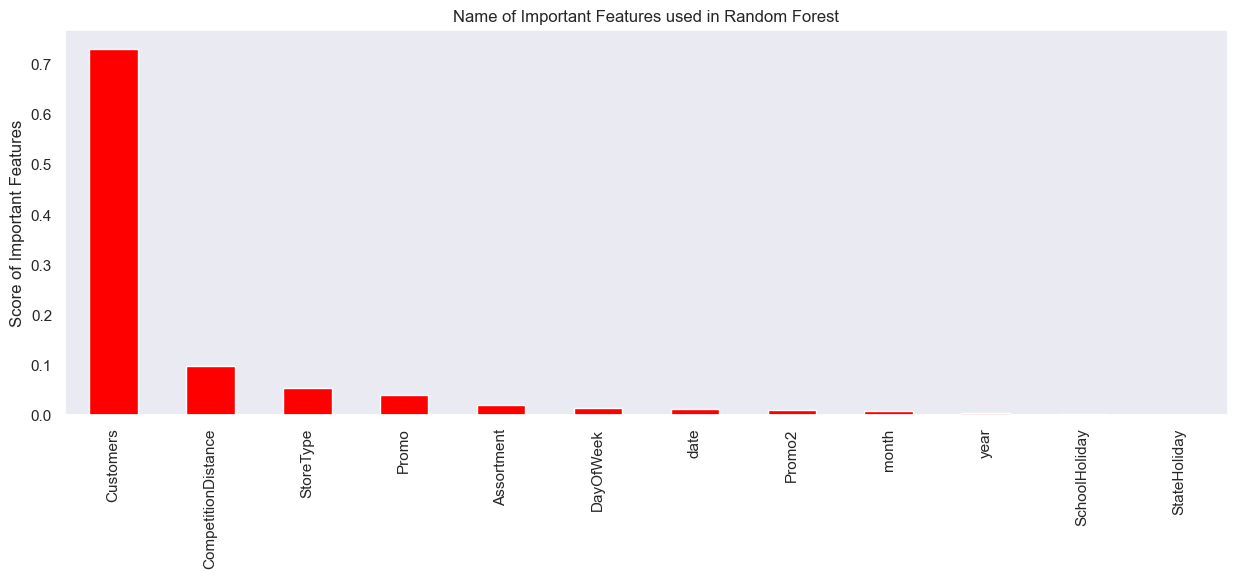

In [110]:
feat_imp = pd.Series(Rforest.feature_importances_, list(x_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(15, 5))
feat_imp.plot(kind='bar', title='Name of Important Features used in Random Forest',color='red')
plt.ylabel('Score of Important Features')
plt.grid()
plt.show()